# Credit Card Fraud Detection Using Machine Learning

### Problem statement:

The problem we're tackling is credit card fraud, where people try to make unauthorized transactions using stolen card information. Our goal is to build a machine learning models that can quickly spot these fraudulent transactions while making sure not to mistake regular transactions as fraud. By doing this, we aim to protect both businesses and individuals from financial losses and maintain trust in the credit card system.

### Project goals:
The main aim of this project is the detection of credit card fraudulent transactions, as it’s
important to figure out the fraudulent transactions so that customers don’t get charged for
the purchase of products that they didn’t buy. The detection of the credit card fraudulent
transactions will be performed with multiple ML techniques then a comparison will be
made between the outcomes and results of each technique to find the best and most
suited model in the detection of the credit card transaction that are fraudulent, graphs and
numbers will be provided as well. In addition, exploring previous literatures and different
techniques used to distinguish the fraud within a dataset.

Research question: What is the most suited machine learning model in the detection of
fraudulent credit card transactions?

### Features:

<li>Time:
The seconds elapsed between the first transaction in the dataset and the current transaction.Type: Numeric</li>

    
<li>V1, V2, ..., V28:
These are the principal components obtained using PCA (Principal Component Analysis) to protect user identities and sensitive features. Hence, the original features are not provided. Type: Numeric</li>


<li>Amount:
The transaction amount; this feature can be used for example-dependent cost-sensitivity learning.
Type: Numeric</li>


<li>Class:
The class label, where 1 indicates a fraudulent transaction and 0 indicates a non-fraudulent transaction.
Type: Binary (0 or 1)</li>

In [154]:
#important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## models from sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## model Evaluation
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.feature_selection import RFE

import warnings
warnings.filterwarnings('ignore')

In [155]:
data = pd.read_csv(r"C:\Users\Priya\OneDrive\Desktop\Python imarticus data files\credit_card.csv")

In [156]:
data.shape

(284807, 31)

In [157]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [158]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [159]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [160]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [161]:
data.Class.value_counts()
# 0 represents non-fraudulent transactions
# 1 represents fraudulent transactions

0    284315
1       492
Name: Class, dtype: int64

### Exploratory Data Analysis(EDA)

Text(0, 0.5, 'count')

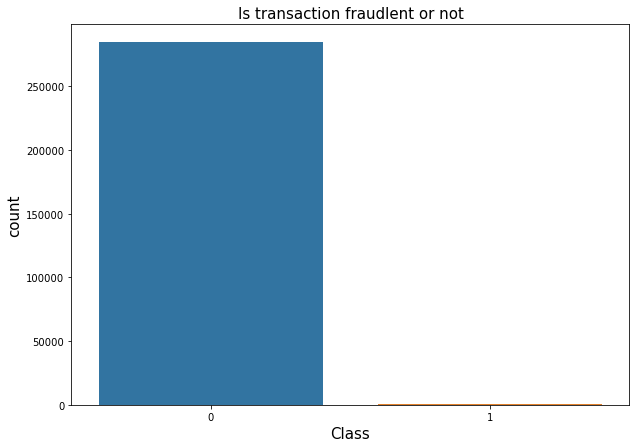

In [162]:
plt.figure(figsize = (10,7))
sns.countplot(data['Class']);
plt.title('Is transaction fraudlent or not', fontsize = 15)
plt.xlabel('Class', fontsize = 15)
plt.ylabel('count', fontsize = 15)

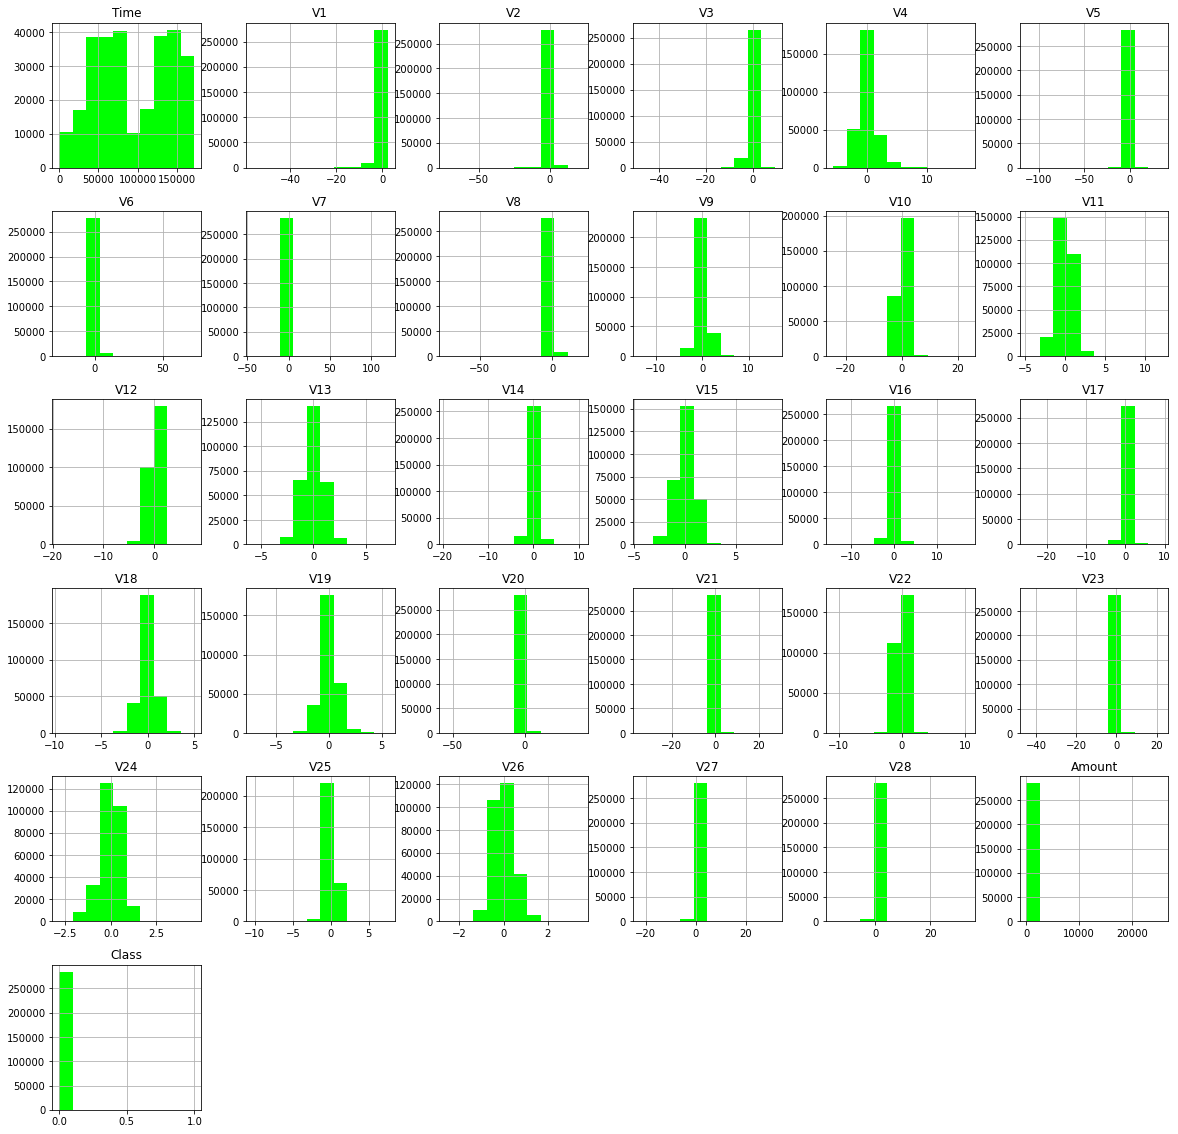

In [163]:
data.hist(figsize=(20,20),color= "lime")
plt.show()

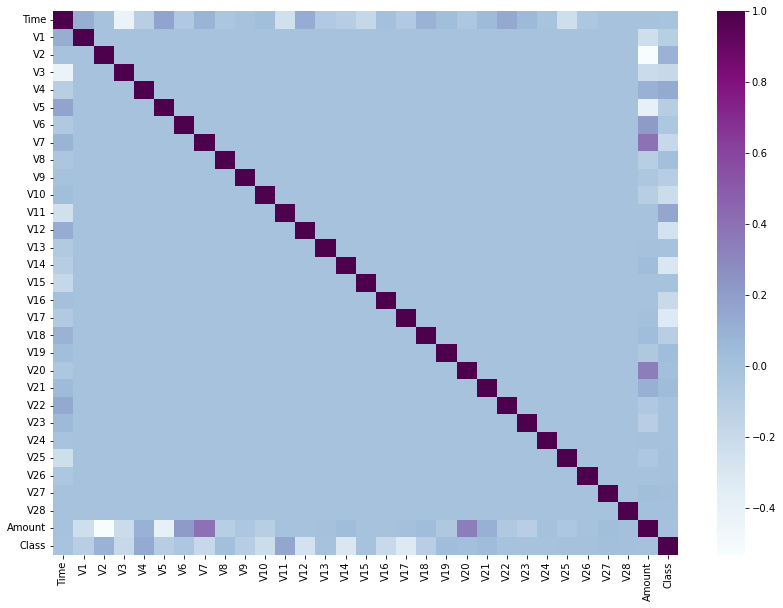

In [164]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), cmap ="BuPu"); 

## Data Preprocessing

<li> Cleaning: Data cleaning is a very important procedure in the path of data science as it constitutes the
major part of the work. It includes removing missing data and complexity with naming category and so on.
For most of the data scientists, Data Cleaning continues of 80% of work.</li>

In [165]:
data.isnull().sum()[data.isnull().sum() > 0]

Series([], dtype: int64)

In [166]:
data.select_dtypes(include = "object").columns

Index([], dtype='object')

In [167]:
data["check_duplicate"]=data.duplicated()
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,check_duplicate
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,False
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,False
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,False
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,False


## Data Sampling

<li> Sampling: This is the technique of analyzing the subsets from whole large datasets, which could provide a
better result and help in understanding the behavior and pattern of data in an integrated way </li>

In [168]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size = 0.3)

In [169]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [170]:
X = data.drop("Class", axis = 1)
Y = data.Class

In [171]:
X = scalar.fit_transform(X)

In [172]:
data_train_x, data_test_x, data_train_y, data_test_y = train_test_split(X, Y, test_size = 0.3, random_state = 1)

## 1.logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(data_train_x , data_train_y)
pred_test  = logreg.predict(data_test_x)

mat_test = confusion_matrix(data_test_y , pred_test)
mat_test

array([[85293,    15],
       [   57,    78]], dtype=int64)

In [174]:
lg_acc = accuracy_score(data_test_y , pred_test)
lg_acc

0.9991573329588147

In [175]:
## classification report of Logistics Regression

print(classification_report(data_test_y , pred_test) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.84      0.58      0.68       135

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



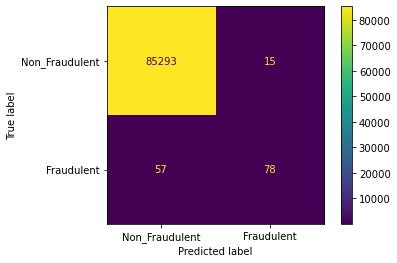

In [176]:
var1 = ConfusionMatrixDisplay(mat_test , display_labels = ['Non_Fraudulent', 'Fraudulent'])
var1.plot();

## 2.Decision Tree

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(data_train_x , data_train_y)
pred_test_dt = dt.predict(data_test_x)

mat_dt = confusion_matrix(data_test_y , pred_test_dt)
mat_dt

array([[85268,    40],
       [   36,    99]], dtype=int64)

In [178]:
dt_acc = accuracy_score(data_test_y , pred_test_dt)
dt_acc

0.9991105181231933

In [179]:
## classification report of DecisionTree

print(classification_report(data_test_y , pred_test_dt) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.71      0.73      0.72       135

    accuracy                           1.00     85443
   macro avg       0.86      0.87      0.86     85443
weighted avg       1.00      1.00      1.00     85443



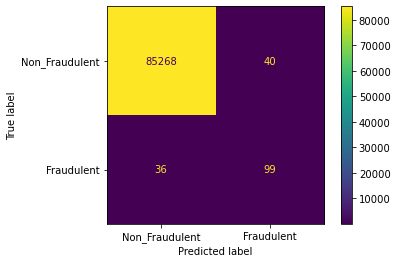

In [180]:
var1 = ConfusionMatrixDisplay(mat_dt , display_labels = ['Non_Fraudulent', 'Fraudulent'])
var1.plot();

## 3.Random Forest

In [181]:
from sklearn.ensemble import RandomForestClassifier 
rfc = RandomForestClassifier()

rfc.fit(data_train_x , data_train_y)
pred_test_rfc = rfc.predict(data_test_x)

mat_rfc = confusion_matrix(data_test_y , pred_test_rfc)
mat_rfc

array([[85298,    10],
       [   30,   105]], dtype=int64)

In [182]:
rfc_acc = accuracy_score(data_test_y , pred_test_rfc)
rfc_acc

0.9995318516437859

In [183]:
## classification report of RandomForestClassifier
print(classification_report(data_test_y , pred_test_rfc) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.91      0.78      0.84       135

    accuracy                           1.00     85443
   macro avg       0.96      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443



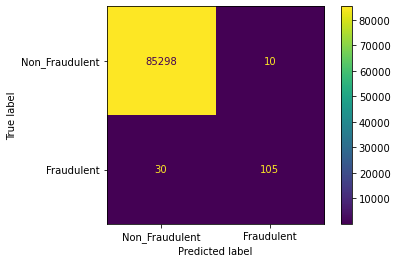

In [184]:
var1 = ConfusionMatrixDisplay(mat_rfc , display_labels = ['Non_Fraudulent', 'Fraudulent'])
var1.plot();

## 4.Support Vector Machine(SVM)

In [185]:
from sklearn.svm import SVC
svm = SVC()

svm.fit(data_train_x , data_train_y)
pred_test_svm = svm.predict(data_test_x)

mat_svm = confusion_matrix(data_test_y , pred_test_svm)
mat_svm

array([[85304,     4],
       [   50,    85]], dtype=int64)

In [186]:
svm_acc = accuracy_score(data_test_y , pred_test_svm)
svm_acc

0.9993679997191109

In [187]:
## classification report of SVM

print(classification_report(data_test_y , pred_test_svm) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.96      0.63      0.76       135

    accuracy                           1.00     85443
   macro avg       0.98      0.81      0.88     85443
weighted avg       1.00      1.00      1.00     85443



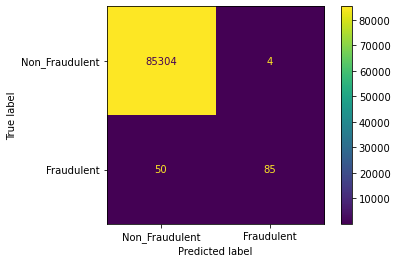

In [188]:
var1 = ConfusionMatrixDisplay(mat_svm , display_labels = ['Non_Fraudulent', 'Fraudulent'])
var1.plot();

## 5.KNN

In [189]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(data_train_x , data_train_y)
pred_test_knn = knn.predict(data_test_x)

mat_knn = confusion_matrix(data_test_y , pred_test_knn)
mat_knn

array([[85299,     9],
       [   38,    97]], dtype=int64)

In [190]:
knn_acc = accuracy_score(data_test_y , pred_test_knn)
knn_acc

0.9994499256814484

In [191]:
## classification report of KNN

print(classification_report(data_test_y , pred_test_knn) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.92      0.72      0.80       135

    accuracy                           1.00     85443
   macro avg       0.96      0.86      0.90     85443
weighted avg       1.00      1.00      1.00     85443



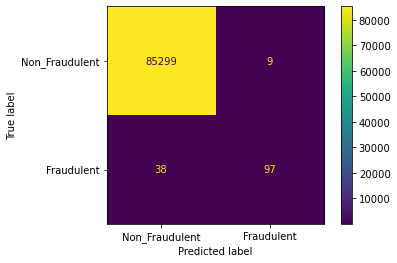

In [192]:
var1 = ConfusionMatrixDisplay(mat_knn , display_labels = ['Non_Fraudulent', 'Fraudulent'])
var1.plot();

### Model Accuracy Comparison

In [193]:
Models = ('logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'KNN')
Accuracy = (lg_acc, dt_acc, rfc_acc, svm_acc, knn_acc)

In [194]:
model_compare              = pd.DataFrame()
model_compare['Models']    = Models
model_compare['Accuracy']  = Accuracy
model_compare

,Models,Accuracy
0,logistic Regression,0.999157
1,Decision Tree,0.999111
2,Random Forest,0.999532
3,SVM,0.999368
4,KNN,0.999450


### Conclusion :
Hence, we have acquired the result of an accurate value of credit card fraud detection i.e. 0.9995 (99.95%) using a random forest algorithm with new enhancements. In comparison to existing modules, this proposed module is applicable for the larger dataset and provides more accurate results. The Random forest algorithm will provide better performance with many training data, but speed during testing and application will still suffer. Usage of more pre-processing techniques would also assist.  All Rights Reserved 79 Our future work will try to represent this into a software application and provide a solution for credit card fraud using the new technologies like Machine Learning